In [1]:
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
import h5py

import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.tools.plotting import parallel_coordinates

from sklearn.svm import SVC # "Support vector classifier"

from sklearn.metrics import jaccard_similarity_score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#IMPORT DATA
train_dataset = h5py.File('train_signing.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:6150]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:6150]) # your train set labels

test_dataset = h5py.File('test_signing.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:1655]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:1655]) # your test set labels

train_set_y_orig = train_set_y_orig.reshape(train_set_x_orig.shape[0], 1)
test_set_y_orig = test_set_y_orig.reshape(test_set_x_orig.shape[0], 1)

In [3]:
# Reshape the training and test examples 
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten.T
test_x = test_x_flatten.T
train_y = train_set_y_orig
test_y = test_set_y_orig

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

print ("labels shape: " + str(train_y.shape))
#print("particular example: " + str(test_x_flatten[:, index]))
print(train_x.dtype)

train_x's shape: (6150, 14)
test_x's shape: (1655, 14)
labels shape: (6150, 1)
float64


0.5

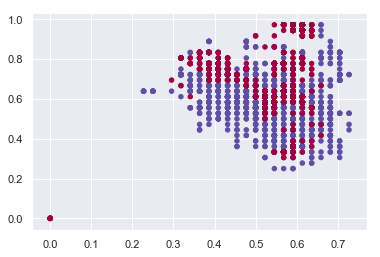

In [4]:
#plotting the positions of the right wrist or a different feature
plt.scatter(train_x[:, 12], train_x[:, 13], c=train_y[:,0], s=20, cmap=plt.cm.Spectral);
train_x[0, 0]

In [5]:
# strarting pca
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(train_x))


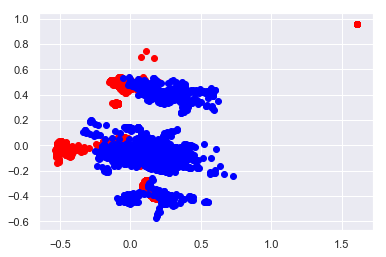

In [6]:
plt.scatter(transformed[train_y==0][0], transformed[train_y==0][1], label='Class 1', c='red')
plt.scatter(transformed[train_y==1][0], transformed[train_y==1][1], label='Class 2', c='blue')

In [7]:
## try SVM linear
model = SVC(kernel='linear', C=1E10)
model.fit(train_x, train_y)
#measure accuracy
print('train accuracy: '+str(jaccard_similarity_score(model.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model.predict(test_x), test_y)))


C:\Users\varg_\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.8764227642276423
test accuracy: 0.7492447129909365


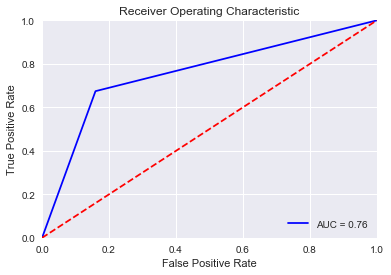

In [8]:
# create roc curve
probs = model.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\fragkiadakism\AppData\Local\Continuum\anaconda3\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.9673170731707317
test accuracy: 0.83202416918429


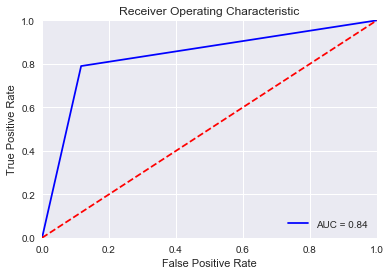

In [9]:
## SVM rbf
model2 = SVC(kernel='rbf', C=1E10)
#model2 = SVC(kernel='rbf')
model2.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model2.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model2.predict(test_x), test_y)))

# create roc curve
probs = model2.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\fragkiadakism\AppData\Local\Continuum\anaconda3\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.8339837398373984
test accuracy: 0.713595166163142


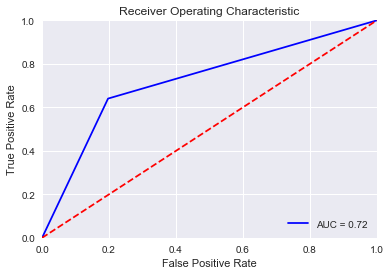

In [10]:
## SVM sigmoid
model3 = SVC(kernel='sigmoid')
model3.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model3.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model3.predict(test_x), test_y)))

# create roc curve
probs = model3.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\fragkiadakism\AppData\Local\Continuum\anaconda3\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.9650406504065041
test accuracy: 0.8435045317220544


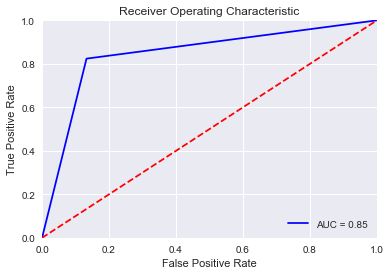

In [11]:
## SVM polynomial
model4 = SVC(kernel='poly', gamma = 14)
model4.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model4.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model4.predict(test_x), test_y)))

# create roc curve
probs = model4.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\varg_\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy: 0.9934959349593496
test accuracy: 0.8308157099697885


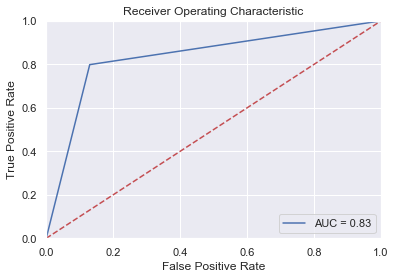

In [8]:
# random forest
model5 = RandomForestClassifier(n_jobs=2, random_state=0)
model5.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model5.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model5.predict(test_x), test_y)))

# create roc curve
probs = model5.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()